<a href="https://colab.research.google.com/github/RabihSouiden/Ciencias-de-a-computacion/blob/main/Reporte_Lesiones_Personales_y_en_Accidente_de_Transito_Policia_Nacional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importamos pandas-profiling

In [1]:
 pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

     | 25.9 MB 888 kB/s
     |████████████████████████████████| 10.9 MB 4.1 MB/s 
     |████████████████████████████████| 596 kB 39.8 MB/s 
     |████████████████████████████████| 102 kB 9.0 MB/s 
     |████████████████████████████████| 675 kB 41.9 MB/s 
     |████████████████████████████████| 4.7 MB 33.7 MB/s 
     |████████████████████████████████| 63 kB 1.1 MB/s 
     |████████████████████████████████| 812 kB 49.0 MB/s 
     |████████████████████████████████| 38.1 MB 59.9 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.1.1-py2.py3-none-any.whl size=261287 sha256=fcd8fd15d2ee7da8ca3d0d6d3d3a0bb5f054ba95abffcc07871674864062b6b2
  Stored in directory: /tmp/pip-ephem-wheel-cache-2i5iv53x/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=927508c1be98f705725caf7924df3e124e89b9e455ae414a5a5138fb638814cb
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14

# Extraemos los datos

In [2]:
import pandas as pd
from pandas_profiling import ProfileReport

df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTcTKd7Oww6bCWOx-AFNAZ8aZ3ISgdi1TDYq6J7G9YhS5SiYY3s4vLLa0lK6toSj4gEA9XpRBQyQTz4/pub?gid=312107068&single=true&output=csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (2,5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df = df.drop_duplicates()
df['FECHA HECHO'] = pd.to_datetime(df['FECHA HECHO'], format='%d/%m/%Y')
df

,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARIO,DESCRIPCIÓN CONDUCTA,CANTIDAD
0,ANTIOQUIA,GIRARDOTA,5308000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,FEMENINO,ADULTOS,LESIONES PERSONALES,2
1,ANTIOQUIA,GIRARDOTA,5308000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,MASCULINO,ADULTOS,LESIONES PERSONALES,1
2,ANTIOQUIA,MUTATÁ,5480000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,MASCULINO,ADULTOS,LESIONES PERSONALES,1
3,ANTIOQUIA,NECOCLÍ,5490000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,FEMENINO,ADULTOS,LESIONES PERSONALES,1
4,ATLÁNTICO,BARRANQUILLA (CT),8001000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,FEMENINO,ADULTOS,LESIONES PERSONALES,2
...,...,...,...,...,...,...,...,...,...
1003237,TOLIMA,IBAGUÉ (CT),73001000,NO REPORTADO,2021-07-05,NaN,NaN,LESIONES PERSONALES,1
1003238,TOLIMA,IBAGUÉ (CT),73001000,NO REPORTADO,2021-07-11,NaN,NaN,LESIONES PERSONALES,1
1003239,TOLIMA,IBAGUÉ (CT),73001000,NO REPORTADO,2021-08-12,NaN,NaN,LESIONES PERSONALES,1
1003240,TOLIMA,IBAGUÉ (CT),73001000,NO REPORTADO,2021-08-13,NaN,NaN,LESIONES PERSONALES,1


# Generamos el Reporte para explorar los datos

In [4]:
profile = ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Punto 1
1.	¿Cuáles han sido los departamentos (TOP 3) más afectados a nivel histórico y en el último año?

Realizamos un filtrado sobre el ultimo año 2021
Se realiza un group by por departamento que no utilice indices nuevos, y nos sume la columna cantidad, la cual da la cantidad de delitps cometidos, luego organizamos los valores de cantidad de manera descendente y mostramos los 3 primeros datos

In [5]:
a = df
a['AÑO'] = pd.DatetimeIndex(df['FECHA HECHO']).year
cond1 = a['AÑO']== 2012
a = a[cond1]
a = a.groupby('DEPARTAMENTO', as_index=False)['CANTIDAD'].sum().sort_values(by=['CANTIDAD'], ascending=False).head(3)
a

,DEPARTAMENTO,CANTIDAD
12,CUNDINAMARCA,19667
29,VALLE,15066
26,SANTANDER,11548


# Punto 2
2.	¿Cuál ha sido históricamente el arma o medio más común para cometer el delito?

Realizamos una agrupación de los datos por el arma medio sin generar otro indice y sumando la columna cantidad, así organizamos los valores por este valor y mostramos los 3 primeros datos

In [6]:
 b = df.groupby('ARMAS MEDIOS', as_index=False)['CANTIDAD'].sum().sort_values(by=['CANTIDAD'], ascending=False).head(3)
 b

,ARMAS MEDIOS,CANTIDAD
19,CONTUNDENTES,545485
6,ARMA BLANCA / CORTOPUNZANTE,407919
43,VEHICULO,250031


# Punto 3
3.	¿Cómo es la proporción de géneros y grupos etarios que han estado involucrados en este tipo de delito? ¿Han variado con el paso de los años?

Realizamos la agrupación por dos columnas, Fecha y Genero.
Y realizamos un pivot a esa tabla, el pivot nos permite buscar las variables categoricas de la columna dada (Genero) y sumar los valores de la columna cantidad

In [7]:
#c = df[['GENERO','FECHA HECHO', 'CANTIDAD']]
c  = df.groupby(['FECHA HECHO', 'GENERO'])['CANTIDAD'].sum().reset_index()
#c.set_index('FECHA HECHO', inplace=True)
c = pd.pivot_table(c,index=["FECHA HECHO"], columns= 'GENERO', values='CANTIDAD')
c

GENERO,-,FEMENINO,MASCULINO,NO REPORTA
FECHA HECHO,,,,
2010-01-01,NaN,313.0,670.0,1.0
2010-01-02,NaN,98.0,166.0,NaN
2010-01-03,NaN,115.0,173.0,NaN
2010-01-04,NaN,88.0,144.0,NaN
2010-01-05,NaN,82.0,127.0,NaN
...,...,...,...,...
2021-12-26,NaN,2.0,1.0,NaN
2021-12-27,NaN,NaN,2.0,NaN
2021-12-28,NaN,1.0,NaN,NaN


Una vez tenemos organizados los datos procedemos a gráficar para visualizar mejor entre cada uno de los generos su cantidad a lo largo del tiempo

Utilizamos la libreria *matplotlib*

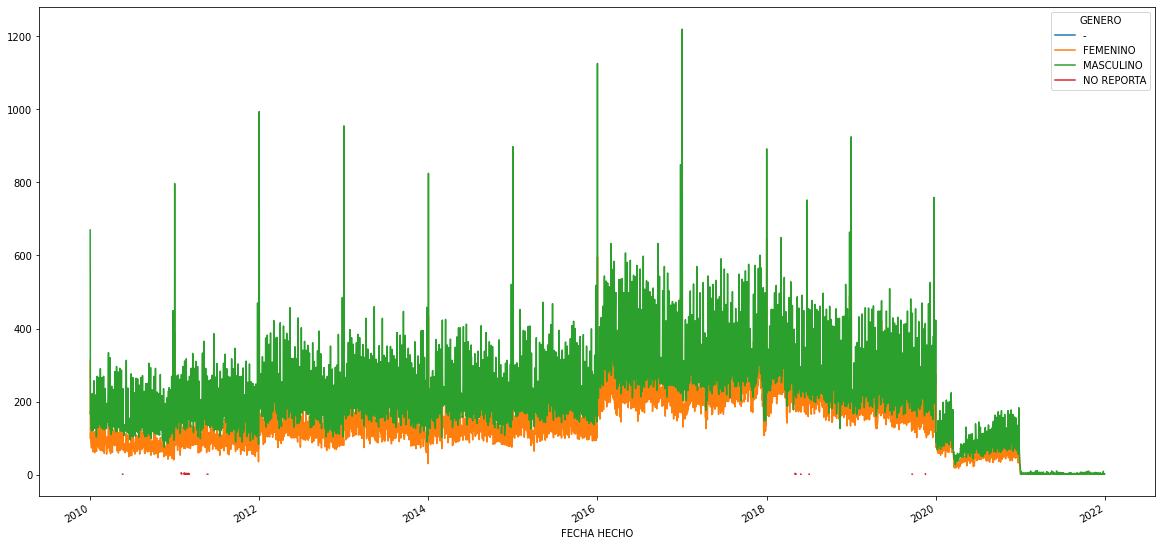

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

c.plot(figsize=(20,10));

# Punto 4
4.	¿Se evidencia alguna tendencia para cometer dicho delito en algún mes particular del año?

Para lograr resolver esta pregunta, primero separamos año y mes de la fecha de hecho.

In [9]:
d = df
#d['FECHA HECHO'] = d['FECHA HECHO'].strftime('%Y-%m-%d')
d['AÑO'] = pd.DatetimeIndex(df['FECHA HECHO']).year
d['MES'] = pd.DatetimeIndex(df['FECHA HECHO']).month
d.tail()

,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARIO,DESCRIPCIÓN CONDUCTA,CANTIDAD,AÑO,MES
1003237,TOLIMA,IBAGUÉ (CT),73001000,NO REPORTADO,2021-07-05,NaN,NaN,LESIONES PERSONALES,1,2021,7
1003238,TOLIMA,IBAGUÉ (CT),73001000,NO REPORTADO,2021-07-11,NaN,NaN,LESIONES PERSONALES,1,2021,7
1003239,TOLIMA,IBAGUÉ (CT),73001000,NO REPORTADO,2021-08-12,NaN,NaN,LESIONES PERSONALES,1,2021,8
1003240,TOLIMA,IBAGUÉ (CT),73001000,NO REPORTADO,2021-08-13,NaN,NaN,LESIONES PERSONALES,1,2021,8
1003241,TOLIMA,IBAGUÉ (CT),73001000,NO REPORTADO,2021-08-15,NaN,NaN,LESIONES PERSONALES,1,2021,8


Una vez tenemos los datos podemos agruparlos por el mes y sumar la cantidad de delitos de cada uno
Una vez obtenidos los datos en un dataframe procedemos a graficarlos

MES
1     138654
2     131930
3     140246
4     127447
5     134986
6     131154
7     134172
8     133310
9     131905
10    128501
11    121608
12    127833
Name: CANTIDAD, dtype: int64


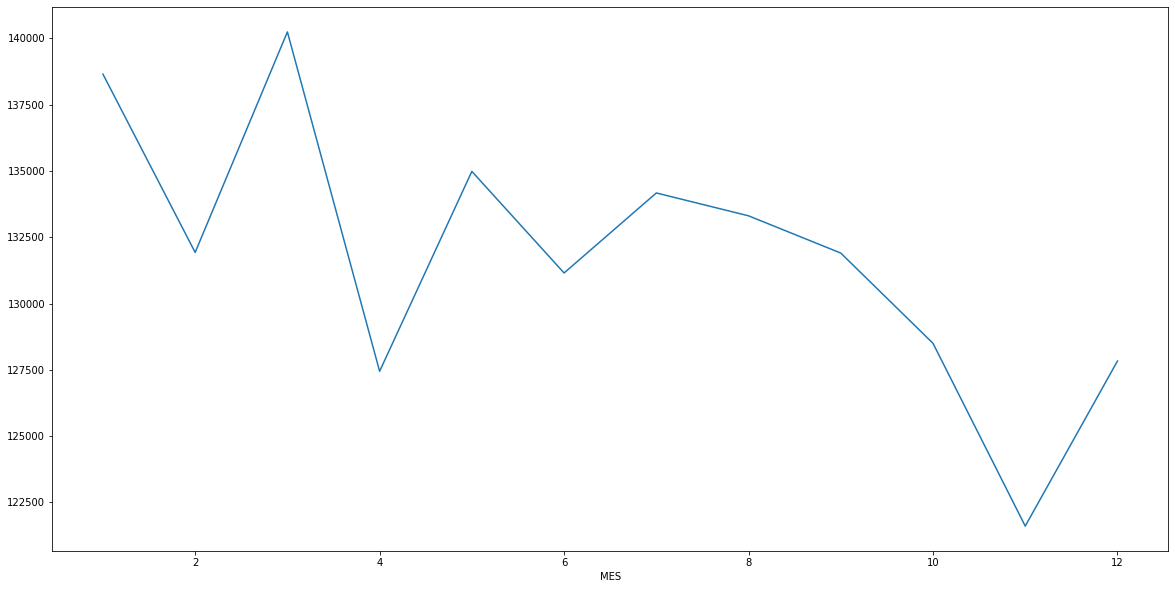

In [10]:
d  = df.groupby(['MES'])['CANTIDAD'].sum()
print(d)
d.plot(figsize=(20,10))

# Punto 5
5.	Para los casos en los que se disponga del detalle del delito o de una descripción, como por ejemplo en delitos sexuales y secuestro, ¿cuáles son los delitos, descripciones o modalidades más comunes?

Para la solución de este punto se agrupo por la columna delito que lista cada uno de los delitos cometidos y sumamos la cantidad para así dar con el top de delitos de todos los tiempos

In [11]:
e = df
e = e.groupby('DESCRIPCIÓN CONDUCTA', as_index=False)['CANTIDAD'].sum().sort_values(by=['CANTIDAD'], ascending=False).head(2)
e

,DESCRIPCIÓN CONDUCTA,CANTIDAD
1,LESIONES PERSONALES,1111403
0,LESIONES CULPOSAS ( EN ACCIDENTE DE TRANSITO ),470343
